In [ ]:
import torch
from ..Config.VisionConfig_f import SigLipVisionConfig
from SigLipVisionModel_f import SigLipVisionModel
from SigLipVisionTransformer_f import SigLipVisionTransformer
import matplotlib.pyplot as plt


In [2]:
config = SigLipVisionConfig()
model = SigLipVisionModel(config)
dummy_input = torch.randn(1, config.num_channels, config.image_size, config.image_size)
output = model(dummy_input)
print("Output shape:", output.shape)  # Expected: [1, num_patches, dmodel]

Output shape: torch.Size([1, 196, 768])


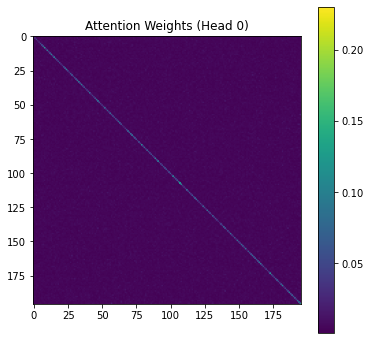

In [3]:
transformer_model = SigLipVisionTransformer(config)
# For a 224x224 image with patch size 16, seq_len = (224/16)^2 = 196
# [batch_size, seq_len, dmodel] 
dummy_input = torch.randn(1, (config.image_size // config.patch_size) ** 2, config.dmodel)
# Forward pass with attention weights returned
attn_out, attn_weights = transformer_model(dummy_input)
# attn_weights: [batch_size, num_heads, seq_len, seq_len]
# Visualize attention for the first head of the first sample
attn = attn_weights[0, 0].detach().cpu().numpy()
plt.figure(figsize=(6, 6))
plt.imshow(attn, cmap='viridis')
plt.title("Attention Weights (Head 0)")
plt.colorbar()
plt.show()
